In [9]:
!pip install antspyx
!pip install deepbrain

In [2]:
%pip install pyrobex

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install medpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [14]:
import nibabel as nib
#from skimage import io, segmentation, color
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from scipy import ndimage
import ants

ModuleNotFoundError: No module named 'ants'

# Mockup de la aplicación

[Link del mockup](https://www.figma.com/file/CEi7r7fd9bamV6zGRWiMV3/Untitled?t=2cPvrjQjRxwFteaS-1)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image_data = nib.load('148/T1.nii.gz')
image_data_flair = nib.load('148/FLAIR.nii.gz')
seg_data = nib.load('148/seg.nii.gz')
seg_info = seg_data.get_fdata()
image_flair = image_data_flair.get_fdata()
image = image_data.get_fdata()
plt.imshow(image_flair[:,:,26])
plt.show()

NameError: name 'nib' is not defined

In [ ]:
image.shape

(256, 256, 192)

In [ ]:
image_flair.shape

(240, 240, 48)

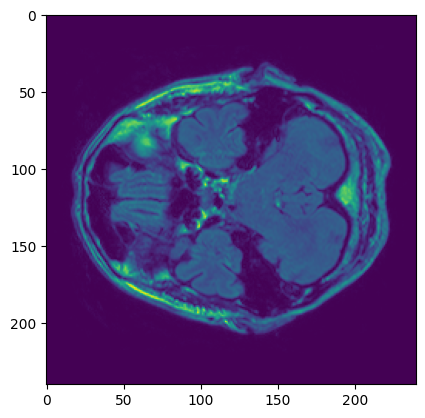

In [ ]:
plt.imshow(image_flair[:,:,13])

# Remoción del cráneo

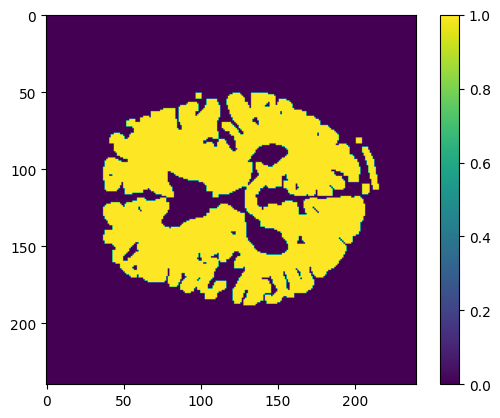

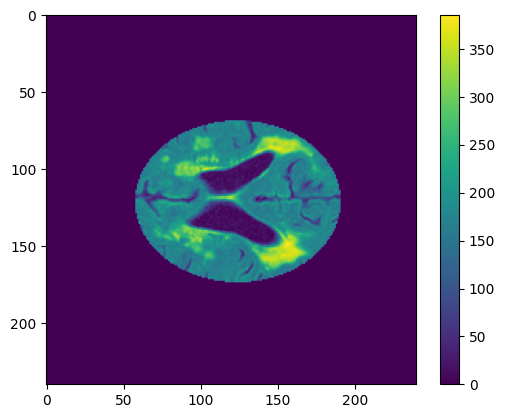

In [ ]:
segmented_image = np.where(image_flair > 105, 1, 0)
kernel = np.ones((2,2,2))
masked = ndimage.binary_opening(segmented_image, structure=kernel, iterations=3)
# Calcular las coordenadas donde hay unos en la imagen segmentada
coords = np.array(np.where(masked == 1))

# Obtener los límites en cada dimensión de la parte segmentada
min_x, max_x = np.min(coords[0]), np.max(coords[0])
min_y, max_y = np.min(coords[1]), np.max(coords[1])
min_z, max_z = np.min(coords[2]), np.max(coords[2])

# Calcular el centro de la elipse
center_x = (max_x + min_x) // 2
center_y = (max_y + min_y) // 2
center_z = (max_z + min_z) // 2

# Calcular el radio de la elipse en cada dimensión
radius_x = (max_x - min_x) // 3
radius_y = (max_y - min_y) // 3
radius_z = (max_z - min_z) // 2

# Crear una matriz de ceros con las dimensiones de la imagen segmentada
mask = np.zeros_like(masked)

# Calcular los índices de las coordenadas dentro de la elipse
coords = np.indices(masked.shape)
inside_ellipse = (
    ((coords[0] - center_x) / radius_x) ** 2 +
    ((coords[1] - center_y) / radius_y) ** 2 +
    ((coords[2] - center_z) / radius_z) ** 2 <= 1
)

# Asignar 1 a las coordenadas dentro de la elipse en la matriz de máscara
mask[inside_ellipse] = 1

# Aplicar la máscara existente a la imagen segmentada
masked_segmented_image = segmented_image * mask

# Realizar la operación de apertura binaria en la imagen segmentada y enmascarada
kernel = np.ones((2, 2, 2))
masked_opening = ndimage.binary_opening(masked_segmented_image, structure=kernel, iterations=3)
#segmented_image = k_means(segmented_image,5)
merged_img = np.multiply(mask, image_flair)
plt.imshow(merged_img[:, :, 30])
plt.colorbar()
plt.show()

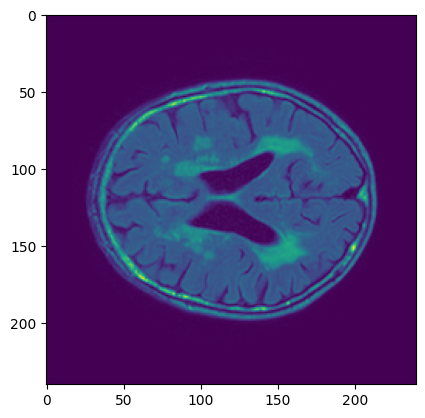

In [ ]:
plt.imshow(image_flair[:,:,30])

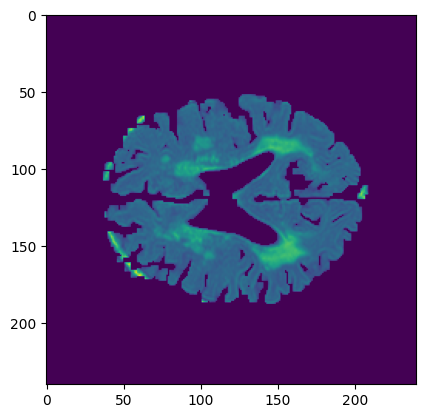

In [ ]:
merged_img = np.multiply(mask, image_flair)
plt.imshow(merged_img[:,:,30])

In [ ]:
import nibabel as nib
from nilearn import masking

def skull_strip(image_path):
    # Load the image
    image = nib.load(image_path)
    data = image.get_fdata()

    # Compute the brain mask
    brain_mask = masking.compute_brain_mask(image)

    # Apply the brain mask to the original data
    skull_stripped_data = data * brain_mask

    # Create a new NiBabel Nifti1Image with the skull-stripped data and header
    skull_stripped_image = nib.Nifti1Image(skull_stripped_data.astype(data.dtype), image.affine)

    return skull_stripped_image

# Example usage
input_image_path = "path_to_input_image.nii.gz"
output_image_path = "path_to_output_image.nii.gz"

skull_stripped_image = skull_strip('/content/drive/MyDrive/Colabs de procesamiento de imágenes/148/FLAIR.nii.gz')

# Save the skull-stripped image
nib.save(skull_stripped_image, output_image_path)





TypeError: ignored

In [ ]:
img = nib.load('/content/path_to_output_image.nii.gz').get_fdata()

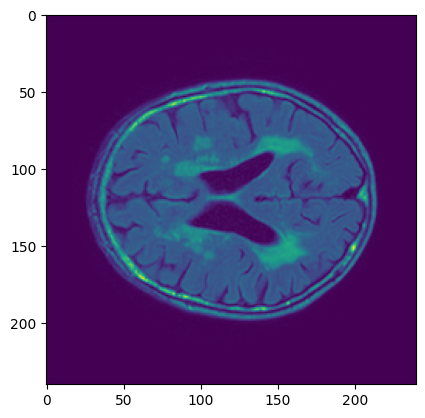

In [ ]:
plt.imshow(img[:,:,30])

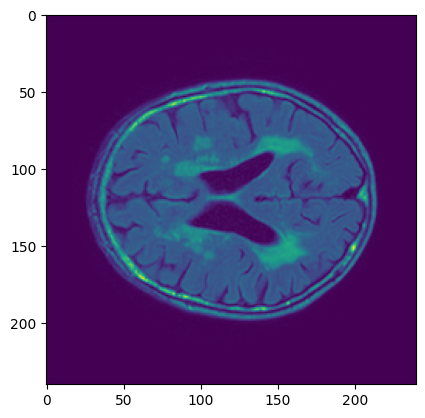

In [ ]:
plt.imshow(image_flair[:,:,30])

In [15]:
from pyrobex.robex import robex
stripped, mask = robex(image_data_flair)

NameError: name 'image_data_flair' is not defined

In [ ]:
stripped_data = stripped.get_fdata()

In [ ]:
mask_data = mask.get_fdata()

In [ ]:
mask_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

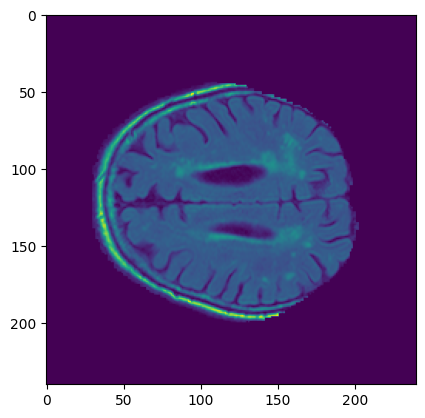

In [ ]:
plt.imshow(stripped_data[:,:,31])

In [ ]:
np.unique(stripped_data, return_counts=True)

(array([  0.        ,   0.75460428,   0.7585631 , ..., 567.64733887,
        580.52734375, 623.15863037]),
 array([2246143,       1,       1, ...,       1,       1,       1]))

In [ ]:
from deepbrain import Extractor

ext = Extractor()

prob = ext.run(image_flair)

AttributeError: ignored

# Thresholding

In [ ]:
"""
The tau controls the velocity of the convergence, it is obtained using the histogram.
The tolerance controls the difference of the tau.
"""

def thresholding(tolerance, current_tau, image):
  while True:

  #Threshold the image using the current threshold tau
    segmentation = image >= current_tau
    #Calculate the mean values for foreground and background regions
    mBG = image[np.multiply(image > 10, segmentation == 0)].mean()
    mFG = image[np.multiply(image > 10, segmentation == 1)].mean()

    #Re calculate the new threshold value
    new_tau = 0.5 * (mBG + mFG)
    print(new_tau)
    #When convergence is reached, break the loop
    if np.abs(current_tau - new_tau) < tolerance:
      return segmentation
    else:
      current_tau = new_tau

68.07436298680884


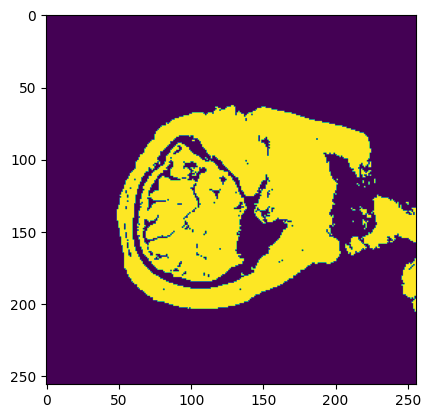

In [ ]:
segmented_image = thresholding(100, 30, image)
plt.imshow(segmented_image[:,:,40]) # Segmentation
plt.show()

# Region growing

In [ ]:
def get_neighbors(matrix, row, col, radius, z_start_layer = 0, z_depth = 0):
    neighbors = []
    for r in range(row - radius, row + radius + 1):
        for c in range(col - radius, col + radius + 1):
            if r == row and c == col:
                continue
            if r < 0 or r >= len(matrix) or c < 0 or c >= len(matrix[0]):
                continue
            for z_index in range(z_depth + 1):
              if abs(r - row) == radius or abs(c - col) == radius:
                neighbors.append((r, c, z_start_layer + z_index))
    return neighbors

In [ ]:
matrix = np.random.randint(1, 5, size=(8, 8))

reference_index = (0, 0)
neighbors = get_neighbors(matrix, *reference_index, 3, 0, 0)

print(matrix)
print("neighbors: ", neighbors)


[[1 3 1 4 1 1 4 3]
 [2 1 1 3 4 1 1 3]
 [1 3 1 2 2 3 3 3]
 [1 4 2 4 1 4 4 3]
 [3 2 2 3 1 1 4 2]
 [2 1 1 1 3 1 3 3]
 [3 2 4 1 4 1 2 4]
 [2 2 3 4 4 2 3 1]]
neighbors:  [(0, 3, 0), (1, 3, 0), (2, 3, 0), (3, 0, 0), (3, 1, 0), (3, 2, 0), (3, 3, 0)]


In [ ]:
def region_growing(x , y, z, tolerance, z_depth, z_layer, image):
  mean_value_cluster = image[x,y,z]
  segmentation = np.zeros_like(image)
  rows_image = image.shape[0]
  radious = 1

  while radious < rows_image:

    neighbors = get_neighbors(image, x, y, radious, 0, image.shape[2] - 1)

    for neighbor_index in neighbors:
      x_index = neighbor_index[0]
      y_index = neighbor_index[1]
      z_index = neighbor_index[2]

      if np.abs(mean_value_cluster - image[x_index, y_index, z_index]) < tolerance:
        segmentation[x_index, y_index, z_index] = 1
      else:
        segmentation[x_index, y_index, z_index] = 0

    radious = radious + 1

  return segmentation



In [ ]:
segmented_image = region_growing(100, 170, 26, 120, 0, 40, image_flair)

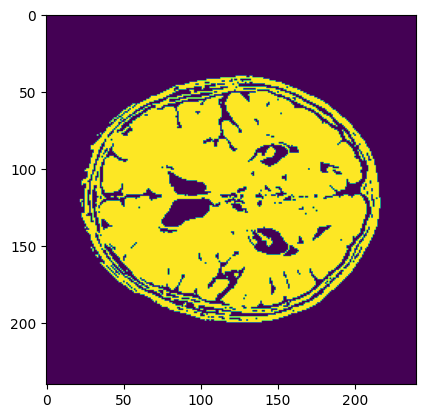

{0.0: 44832, 1.0: 12768}


In [ ]:
plt.imshow(segmented_image[:,:,26])
plt.show()
unique, counts = np.unique(segmented_image[:,:,40], return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
unique, counts = np.unique(segmentation[:,:,40], return_counts=True)
dict(zip(unique, counts))

{0.0: 65536}

# Cluster

In [ ]:
# Calculate the minimum, mean, and maximum values of the image
k1 = np.amin(image)
k2 = np.mean(image)
k3 = np.amax(image)

n = 50
for i in range(n):

  #Calculate the distances from each pixel to the three clusters
  distance_1 = np.abs(k1 - image)
  distance_2 = np.abs(k2 - image)
  distance_3 = np.abs(k3 - image)

  # Create a similar tensor from the image
  segmentation = np.zeros_like(image)
  #group 1
  segmentation[np.multiply(distance_1 < distance_2, distance_1 < distance_3)] = 0
  #group 2
  segmentation[np.multiply(distance_2 < distance_1, distance_2 < distance_3)] = 1
  #group 3
  segmentation[np.multiply(distance_3 < distance_1, distance_3 < distance_2)] = 2

  # Calculate the mean of each group
  k1 = image[segmentation == 0].mean()
  k2 = image[segmentation == 1].mean()
  k3 = image[segmentation == 2].mean()

# Cluster K means

In [7]:
def k_means(image, groups):
  iterations = 60

  k_values = np.linspace(np.amin(image), np.amax(image), groups)
  print(k_values)
  for i in range(iterations):
    d_values = [np.abs(k - image) for k in k_values]
    segmentation = np.argmin(d_values, axis=0)

    for k in range(groups):
      k_values[k] = image[segmentation == k].mean()

  return segmentation

In [ ]:
segmented_image = k_means(image_flair, 5)

[   0.          259.09225464  518.18450928  777.27676392 1036.36901855]


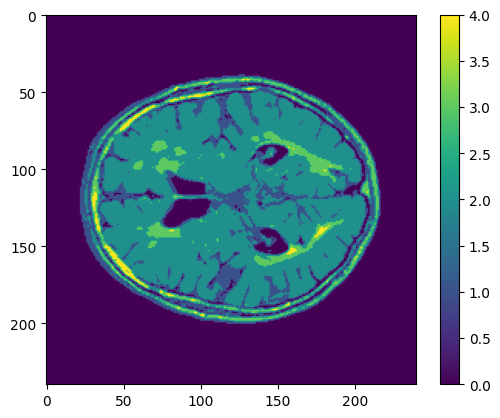

In [ ]:
img = plt.imshow(segmented_image[:,:,26])
plt.colorbar(img)
plt.show()

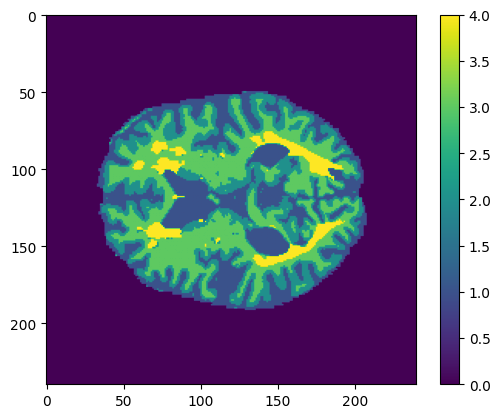

In [ ]:
img = plt.imshow(seg_info[:,:,26])
plt.colorbar(img)
plt.show()

In [ ]:
img_reg = region_growing(100, 170, 26, 120, 0, 40, segmented_image)

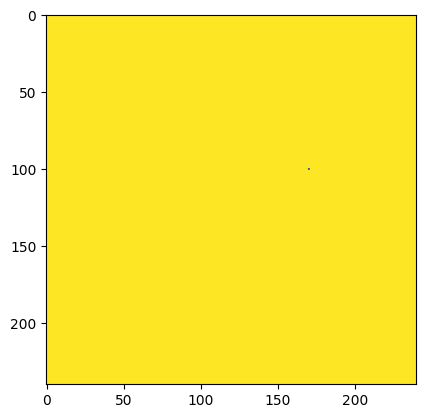

In [ ]:
plt.imshow(img_reg[:,:,20])

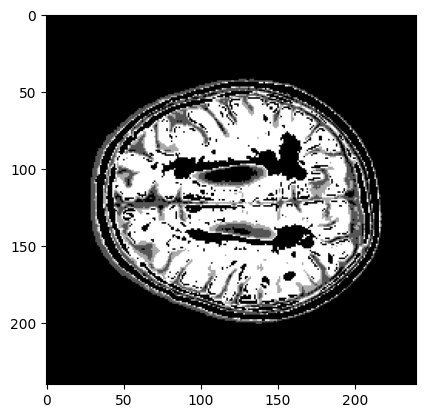

In [ ]:
# Crear una máscara booleana para ocultar los valores iguales a 9
mask = (segmented_image[:, :, 31] < 4)

# Aplicar la máscara a la imagen segmentada
masked_image = segmented_image[:, :, 31].copy()
masked_image[~mask] = 0  # Establecer los valores ocultos a 0 (negro)

# Mostrar la imagen resultante sin los valores iguales a 9
plt.imshow(masked_image, cmap="gray")
plt.show()


In [ ]:
mask = segmented_image == 5
segmented_image[mask] = 0

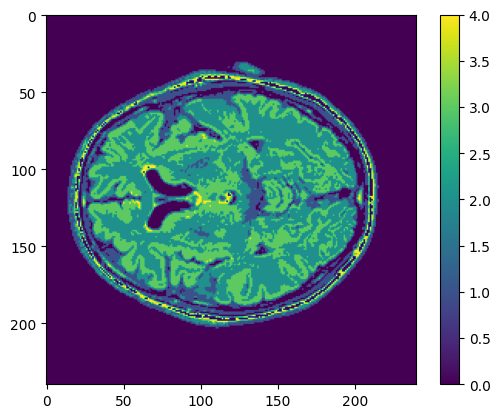

In [ ]:
img = plt.imshow(segmented_image[:,:,19])
plt.colorbar(img)
plt.show()

# GMM

In [ ]:
# Each component has a weight (wi), a mean (mui), and a standard deviation (sdi)
w1 = 1/3
w2 = 1/3
w3 = 1/3
mu1 = 0
sd1 = 50
mu2 = 100
sd2 = 50
mu3 = 150
sd3 = 50

seg = np.zeros_like(image)
for iter in range(1, 5) :

  # Compute likelihood of belonging to a cluster
  p1 = 1/np.sqrt(2*np.pi*sd1**2) * np.exp(-0.5*np.power(image - mu1, 2) / sd1**2)
  p2 = 1/np.sqrt(2*np.pi*sd2**2) * np.exp(-0.5*np.power(image - mu2, 2) / sd2**2)
  p3 = 1/np.sqrt(2*np.pi*sd3**2) * np.exp(-0.5*np.power(image - mu3, 2) / sd3**2)

  # Normalise probability
  r1 = np.divide(w1 * p1, w1 * p1 + w2 * p2 + w3 * p3)
  r2 = np.divide(w2 * p2, w1 * p1 + w2 * p2 + w3 * p3)
  r3 = np.divide(w3 * p3, w1 * p1 + w2 * p2 + w3 * p3)

  # Update parameters
  w1 = r1.mean()
  w2 = r2.mean()
  w3 = r3.mean()
  mu1 = np.multiply(r1, image).sum() / r1.sum()
  sd1 = np.sqrt(np.multiply(r1, np.power(image - mu1, 2)).sum() / r1.sum())
  mu2 = np.multiply(r2, image).sum() / r2.sum()
  sd2 = np.sqrt(np.multiply(r2, np.power(image - mu2, 2)).sum() / r2.sum())
  mu3 = np.multiply(r3, image).sum() / r3.sum()
  sd3 = np.sqrt(np.multiply(r3, np.power(image - mu3, 2)).sum() / r3.sum())

# Perform segmentation
seg[np.multiply(r1 > r2, r1 > r3)] = 0
seg[np.multiply(r2 > r1, r2 > r3)] = 1
seg[np.multiply(r3 > r1, r3 > r2)] = 2

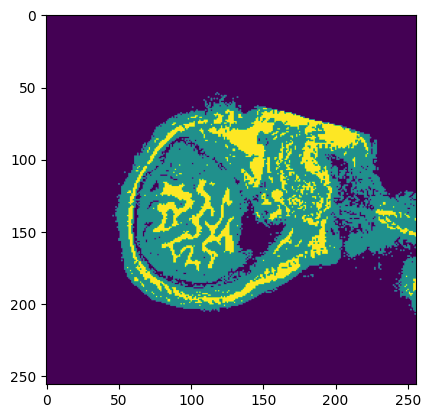

In [ ]:
plt.imshow(seg[:,:,40])
plt.show()

# Standardization

33.81131410090389


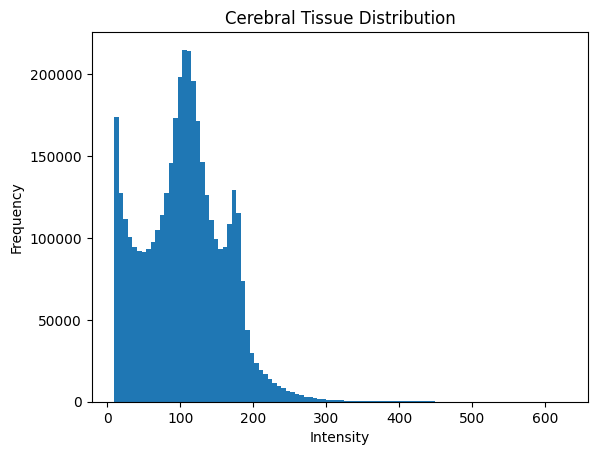

In [ ]:
plt.title('Cerebral Tissue Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.hist(image[image > 10].flatten(),100) #Build a histogram with conditions. The first peak usually represent Cerebrospinal liquid. The second peak Gray Matter and finally the thrid peak is White Matter
print(image.mean())

## Rescaling

In [ ]:
def rescaling(image):

    min = image.min()
    max = image.max()

    rescaled_image = ((image - min)/max-min)

    return rescaled_image

(array([2.44183e+05, 1.50280e+05, 1.19990e+05, 1.07551e+05, 9.79980e+04,
        9.35660e+04, 9.22400e+04, 9.27090e+04, 9.55780e+04, 1.01091e+05,
        1.09411e+05, 1.20720e+05, 1.36504e+05, 1.59080e+05, 1.86949e+05,
        2.09691e+05, 2.18757e+05, 2.07576e+05, 1.85390e+05, 1.58767e+05,
        1.36009e+05, 1.18492e+05, 1.04755e+05, 9.64400e+04, 9.33630e+04,
        1.00972e+05, 1.22580e+05, 1.28380e+05, 9.20400e+04, 5.45290e+04,
        3.47680e+04, 2.58000e+04, 2.10060e+04, 1.80990e+04, 1.52490e+04,
        1.26580e+04, 1.05470e+04, 8.80800e+03, 7.40400e+03, 6.09500e+03,
        5.06200e+03, 4.12700e+03, 3.50300e+03, 2.89100e+03, 2.43900e+03,
        1.89300e+03, 1.72500e+03, 1.39700e+03, 1.13500e+03, 1.01800e+03,
        8.19000e+02, 7.23000e+02, 5.90000e+02, 5.28000e+02, 4.78000e+02,
        4.55000e+02, 3.56000e+02, 3.48000e+02, 2.96000e+02, 2.69000e+02,
        2.55000e+02, 2.34000e+02, 2.65000e+02, 2.53000e+02, 2.16000e+02,
        1.93000e+02, 2.07000e+02, 1.84000e+02, 1.59

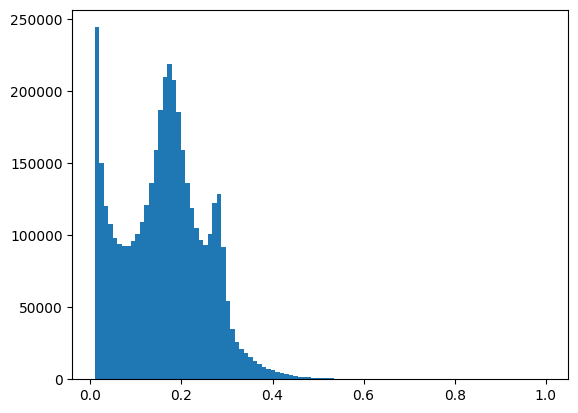

In [ ]:
rescaled_image = rescaling(image)
plt.hist(rescaled_image[rescaled_image > 0.01].flatten(), 100)

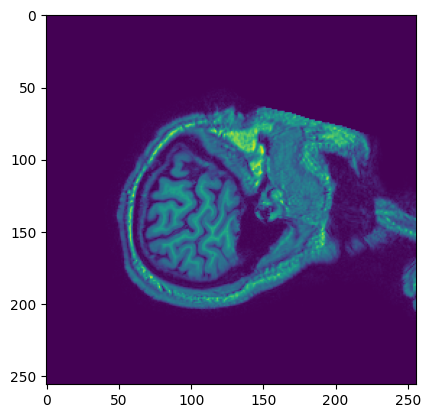

In [ ]:
plt.imshow(image[:,:,40])
plt.show()

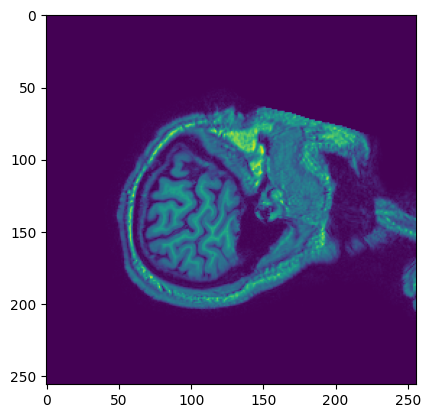

In [ ]:
plt.imshow(rescaled_image[:,:,40])
plt.show()

## Z-score

In [ ]:
def z_score(image):
    std = image[image > 10].std()
    mean = image[image > 10].mean()
    rescaled_image = (image - mean) / std
    print(std,mean)
    return rescaled_image

56.135302538220024 106.4483507948945


(array([1.62127e+05, 1.23799e+05, 1.09492e+05, 9.95420e+04, 9.34100e+04,
        9.16880e+04, 9.17000e+04, 9.37020e+04, 9.85820e+04, 1.05791e+05,
        1.15657e+05, 1.30074e+05, 1.48780e+05, 1.76715e+05, 2.01110e+05,
        2.16282e+05, 2.11850e+05, 1.93087e+05, 1.67262e+05, 1.43087e+05,
        1.24245e+05, 1.08709e+05, 9.86020e+04, 9.27890e+04, 9.52320e+04,
        1.11312e+05, 1.30182e+05, 1.10826e+05, 6.87730e+04, 4.16720e+04,
        2.89250e+04, 2.29020e+04, 1.92230e+04, 1.64710e+04, 1.38240e+04,
        1.14840e+04, 9.54000e+03, 8.18800e+03, 6.61400e+03, 5.57700e+03,
        4.56500e+03, 3.87700e+03, 3.13100e+03, 2.66400e+03, 2.23800e+03,
        1.75000e+03, 1.53800e+03, 1.29900e+03, 1.09800e+03, 9.31000e+02,
        7.33000e+02, 6.91000e+02, 5.59000e+02, 5.06000e+02, 4.92000e+02,
        3.91000e+02, 3.59000e+02, 3.29000e+02, 2.66000e+02, 2.73000e+02,
        2.38000e+02, 2.44000e+02, 2.55000e+02, 2.54000e+02, 2.01000e+02,
        2.08000e+02, 1.93000e+02, 1.79000e+02, 1.61

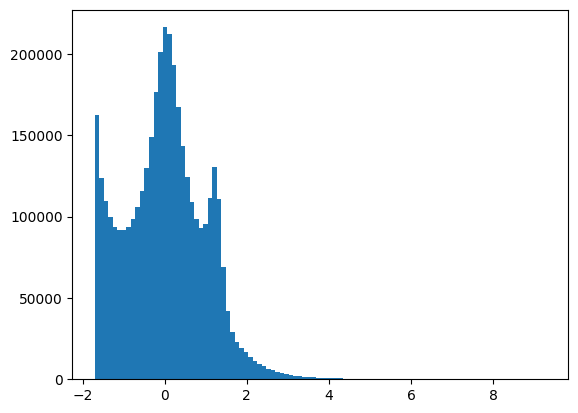

In [ ]:
rescaled_image = z_score(image)
plt.hist(rescaled_image[rescaled_image > -1.7].flatten(), 100)

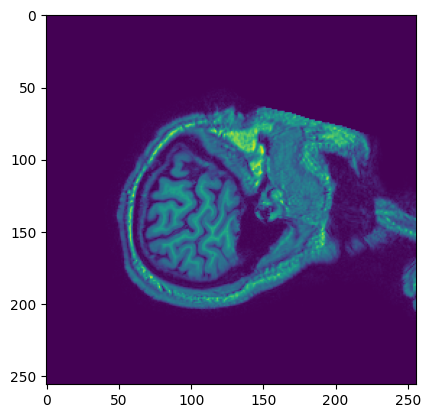

In [ ]:
plt.imshow(rescaled_image[:,:,40])

## White Stripe

In [ ]:
hist, bin_edges = np.histogram(image[image > 10].flatten(), bins=100)

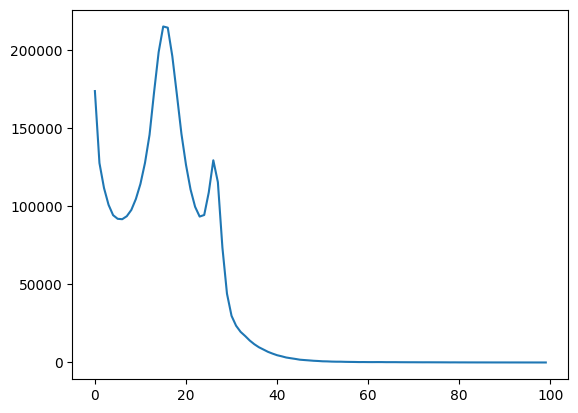

In [ ]:
plt.plot(hist)

In [ ]:
hist

array([173711, 127644, 111675, 100912,  94273,  91957,  91699,  93606,
        97630, 104650, 114298, 127742, 145738, 173148, 198651, 215048,
       214278, 195997, 171507, 146342, 126525, 110747,  99662,  93385,
        94398, 108815, 129427, 115434,  73495,  44038,  29874,  23516,
        19563,  16919,  14038,  11691,   9766,   8300,   6816,   5682,
         4654,   3957,   3186,   2720,   2281,   1784,   1553,   1334,
         1096,    952,    759,    696,    567,    503,    496,    408,
          359,    327,    263,    280,    246,    237,    257,    251,
          204,    207,    205,    172,    161,    147,    146,    132,
          116,    123,    112,    102,     97,     84,     62,     73,
           52,     57,     42,     40,     32,     35,     29,     25,
           23,     22,     23,     13,     18,     14,     11,      9,
            5,      4,      1,      1])

In [ ]:
hist.sort()

In [ ]:
hist

array([     1,      1,      4,      5,      9,     11,     13,     14,
           18,     22,     23,     23,     25,     29,     32,     35,
           40,     42,     52,     57,     62,     73,     84,     97,
          102,    112,    116,    123,    132,    146,    147,    161,
          172,    204,    205,    207,    237,    246,    251,    257,
          263,    280,    327,    359,    408,    496,    503,    567,
          696,    759,    952,   1096,   1334,   1553,   1784,   2281,
         2720,   3186,   3957,   4654,   5682,   6816,   8300,   9766,
        11691,  14038,  16919,  19563,  23516,  29874,  44038,  73495,
        91699,  91957,  93385,  93606,  94273,  94398,  97630,  99662,
       100912, 104650, 108815, 110747, 111675, 114298, 115434, 126525,
       127644, 127742, 129427, 145738, 146342, 171507, 173148, 173711,
       195997, 198651, 214278, 215048])

In [ ]:
bin_edges.sort()

In [ ]:
bin_edges

array([ 10.00000095,  16.17563815,  22.35127535,  28.52691255,
        34.70254974,  40.87818694,  47.05382414,  53.22946134,
        59.40509853,  65.58073573,  71.75637293,  77.93201013,
        84.10764732,  90.28328452,  96.45892172, 102.63455892,
       108.81019611, 114.98583331, 121.16147051, 127.33710771,
       133.5127449 , 139.6883821 , 145.8640193 , 152.0396565 ,
       158.21529369, 164.39093089, 170.56656809, 176.74220529,
       182.91784248, 189.09347968, 195.26911688, 201.44475408,
       207.62039127, 213.79602847, 219.97166567, 226.14730287,
       232.32294006, 238.49857726, 244.67421446, 250.84985166,
       257.02548885, 263.20112605, 269.37676325, 275.55240045,
       281.72803764, 287.90367484, 294.07931204, 300.25494924,
       306.43058643, 312.60622363, 318.78186083, 324.95749803,
       331.13313522, 337.30877242, 343.48440962, 349.66004682,
       355.83568401, 362.01132121, 368.18695841, 374.36259561,
       380.5382328 , 386.71387   , 392.8895072 , 399.06

170.5665680885315 129427.0


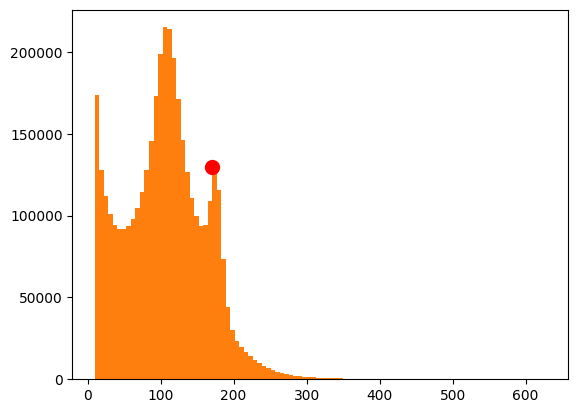

In [ ]:
hist, bins, _ = plt.hist(image[image > 10].flatten(), bins=100)
peaks_indices = argrelmax(hist)[0]
max_peak_values = bins[peaks_indices]
plt.hist(image[image > 10].flatten(), bins=100)
plt.plot(max_peak_values[1], hist[peaks_indices][1], 'ro', markersize=10)
print(max_peak_values[1], hist[peaks_indices][1])
plt.show()

In [ ]:
argrelmax(hist)

(array([15, 26, 59, 62, 65, 73, 79, 81, 85, 90, 92]),)

In [ ]:
bins

array([ 10.00000095,  16.17563815,  22.35127535,  28.52691255,
        34.70254974,  40.87818694,  47.05382414,  53.22946134,
        59.40509853,  65.58073573,  71.75637293,  77.93201013,
        84.10764732,  90.28328452,  96.45892172, 102.63455892,
       108.81019611, 114.98583331, 121.16147051, 127.33710771,
       133.5127449 , 139.6883821 , 145.8640193 , 152.0396565 ,
       158.21529369, 164.39093089, 170.56656809, 176.74220529,
       182.91784248, 189.09347968, 195.26911688, 201.44475408,
       207.62039127, 213.79602847, 219.97166567, 226.14730287,
       232.32294006, 238.49857726, 244.67421446, 250.84985166,
       257.02548885, 263.20112605, 269.37676325, 275.55240045,
       281.72803764, 287.90367484, 294.07931204, 300.25494924,
       306.43058643, 312.60622363, 318.78186083, 324.95749803,
       331.13313522, 337.30877242, 343.48440962, 349.66004682,
       355.83568401, 362.01132121, 368.18695841, 374.36259561,
       380.5382328 , 386.71387   , 392.8895072 , 399.06

In [ ]:
max_peak_values

array([102.63455892, 170.56656809, 374.36259561, 392.8895072 ,
       411.41641879, 460.82151637, 497.87533956, 510.22661395,
       534.92916274, 565.80734873, 578.15862312])

In [ ]:
def get_white_matter(image):
    hist, bins = np.histogram(image[image > 10].flatten(), bins=100)
    peaks_indices = argrelmax(hist)[0]
    max_peak_values = bins[peaks_indices]
    get_white_matter_peak = max_peak_values[1] if len(max_peak_values) > 1 else None
    return get_white_matter_peak

In [ ]:
def get_gray_matter(image):
    hist, bins = np.histogram(image[image > 10].flatten(), bins=100)
    peaks_indices = argrelmax(hist)[0]
    max_peak_values = bins[peaks_indices]
    get_white_matter_peak = max_peak_values[0] if len(max_peak_values) > 1 else None
    return get_white_matter_peak

In [ ]:
get_white_matter(image)

170.5665680885315

In [ ]:
def white_stripe(image, rightmost_value):
    rescaled_image = image / rightmost_value
    return rescaled_image

In [ ]:
rescaled_image = white_stripe(image, get_white_matter(image))
plt.hist(rescaled_image[rescaled_image > 0.01].flatten(), 100)

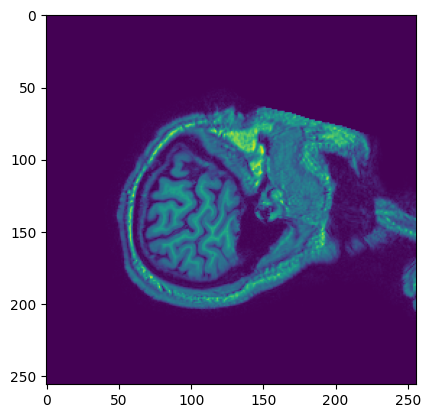

In [ ]:
plt.imshow(rescaled_image[:,:,40])

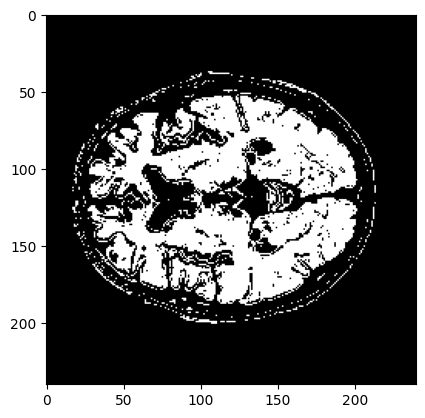

In [ ]:
white_matter_peak = get_white_matter(image_flair)

white_matter_mask = abs(image_flair - white_matter_peak) < 30
0
plt.imshow(white_matter_mask[:,:,20], cmap='gray')

In [ ]:
white_matter_mask

In [ ]:
values = np.unique(white_matter_mask, return_counts=True)

In [ ]:
values

(array([False,  True]), array([2361312,  403488]))

In [ ]:
(values[1][1]/(values[1][1] + values[1][0]))*100

14.59375

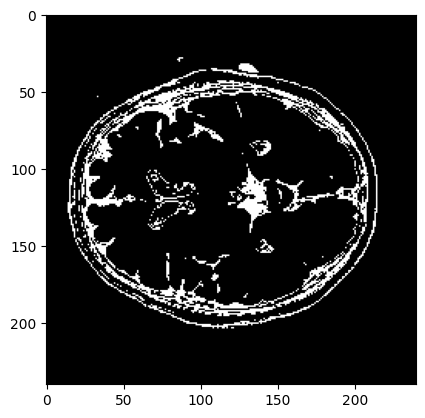

In [ ]:
gray_matter_peak = get_gray_matter(image_flair)

gray_matter_mask = abs(image_flair - gray_matter_peak) < 30
0
plt.imshow(gray_matter_mask[:,:,20], cmap='gray')

In [ ]:
values = np.unique(gray_matter_mask, return_counts=True)

In [ ]:
(values[1][1]/(values[1][1] + values[1][0]))*100

7.902235243055555

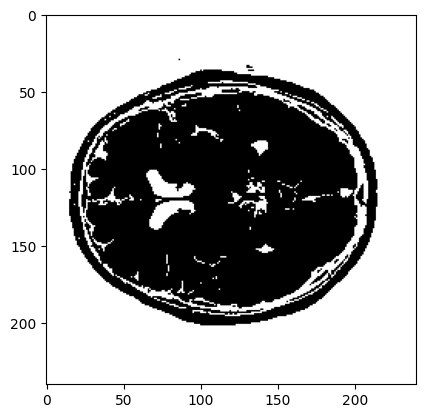

In [ ]:
liquid_mask = abs(image_flair - 20) < 30

plt.imshow(liquid_mask[:,:,20], cmap='gray')

In [ ]:
values = np.unique(liquid_mask, return_counts=True)

In [ ]:
(values[1][1]/(values[1][1] + values[1][0]))*100

69.42838541666667

In [ ]:
liquid_mask

In [ ]:
from skimage.measure import label, regionprops

white_matter_labelled = label(white_matter_mask)
gray_matter_labelled = label(gray_matter_mask)

white_matter_props = regionprops(white_matter_labelled, intensity_image=image_flair)
gray_matter_props = regionprops(gray_matter_labelled, intensity_image=image_flair)

In [ ]:
white_matter_props[0].area

289220

In [ ]:
gray_matter_props[0].area

7

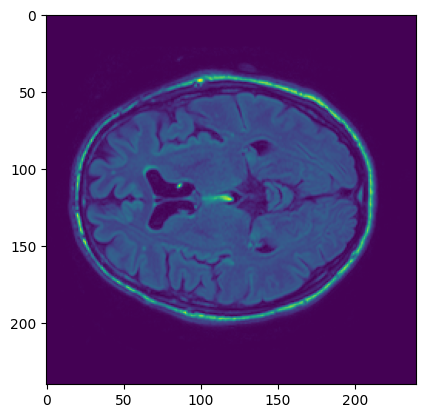

In [ ]:
plt.imshow(image_flair[:,:,20])

## Histogram Matching

In [ ]:
def get_percentiles(image, k, start=0, end=100):
  step = (end - start) / (k - 1)
  percentiles = np.arange(start, end + step, step)
  percentiles_values = np.percentile(image, percentiles)
  return percentiles_values


def histogram_matching(image_src, image_ref, k):
  x1 = get_percentiles(image_src, k)
  x2 = get_percentiles(image_ref, k)
  return np.interp(image_src, x1, x2)

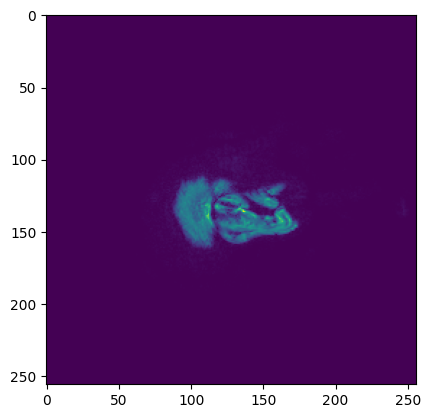

In [ ]:
plt.imshow(image[:,:,20])

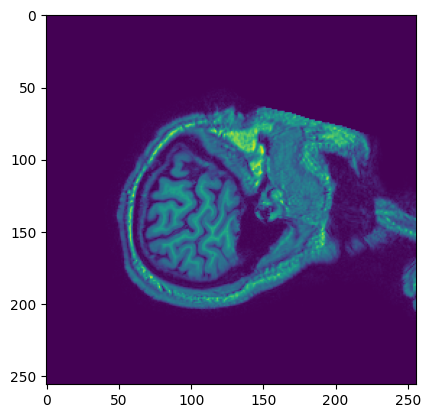

In [ ]:
plt.imshow(image[:,:,40])

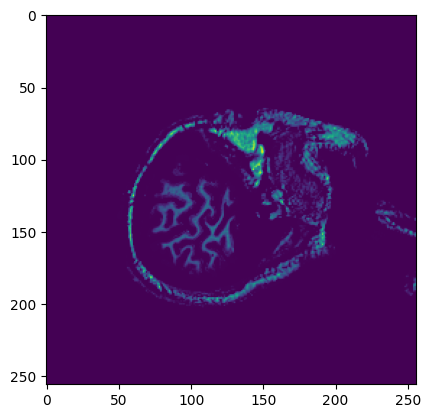

In [ ]:
hm = histogram_matching(image[:,:,40], image[:,:,20], 10)
plt.imshow(hm)
plt.show()

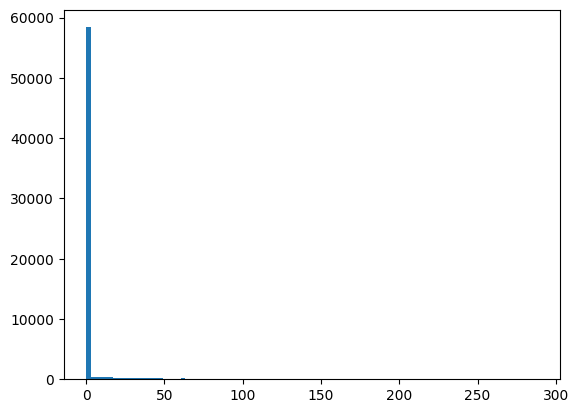

In [ ]:
plt.hist(hm.flatten(), 100)
plt.show()

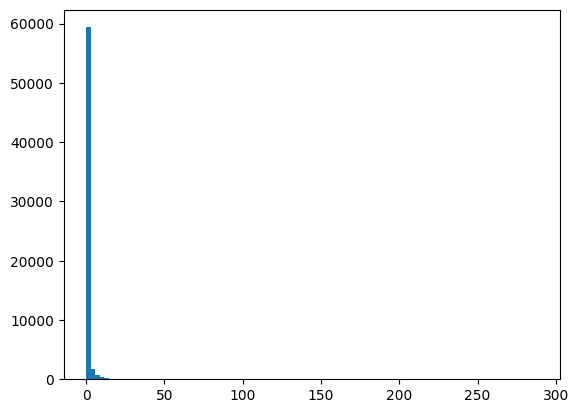

In [ ]:
plt.hist(image[:,:,20].flatten(), 100)
plt.show()

# Denoising

## Mean filter

In [ ]:
def mean_filter(image):
    rows_image = image.shape[0]
    cols_image = image.shape[1]
    sum_values = 0
    filtered_image = np.zeros_like(image)
    for row in range(rows_image):
        for col in range(cols_image):
            neighbors = get_neighbors(image, row, col, 1, 0, 0)
            for neighbor in neighbors:
                x_index = neighbor[0]
                y_index = neighbor[1]
                sum_values += image[x_index, y_index]
            filtered_image[row, col] = sum_values / len(neighbors)
            sum_values = 0
    return filtered_image

In [ ]:
filtered_image = mean_filter(image_flair[:,:,20])

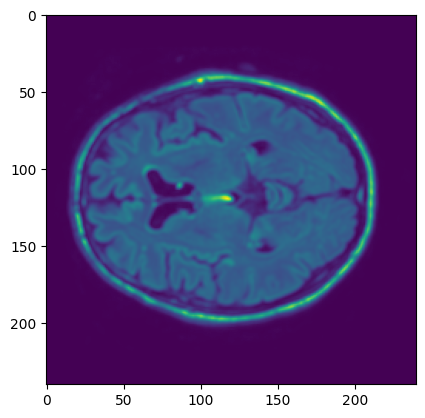

In [ ]:
plt.imshow(filtered_image)

## Median filter

In [ ]:
def median_filter(image):
    rows_image = image.shape[0]
    cols_image = image.shape[1]
    sum_values = 0
    filtered_image = np.zeros_like(image)
    for row in range(rows_image):
        for col in range(cols_image):
            neighbors = get_neighbors(image, row, col, 1, 0, 0)
            neighbors_values = np.array([])
            for neighbor in neighbors:
                x_index = neighbor[0]
                y_index = neighbor[1]
                neighbors_values = np.append(neighbors_values, image[x_index, y_index])
            filtered_image[row, col] = np.median(neighbors_values)
    return filtered_image

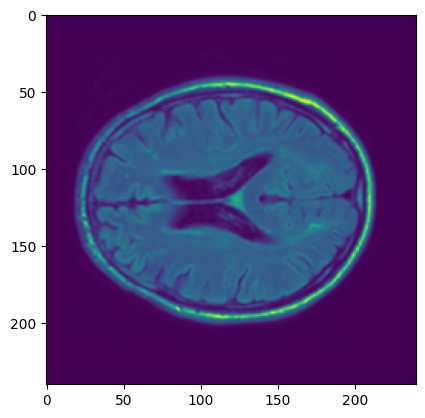

In [ ]:
filtered_image = median_filter(image_flair)
plt.imshow(filtered_image[:,:,26])

## Filter with borders detection

In [ ]:
def filter_image(image):
  filtered_image = np.zeros_like(image)
  for x in range(1, image.shape[0] - 2):
    for y in range(1, image.shape[1] - 2):
      for z in range(1, image.shape[2] - 2):
        avg = 0
        for dx in range(-1, 1):
          for dy in range(-1, 1):
            for dz in range(-1, 1):
              avg = avg + image[x + dx, y + dy, z + dz]
        filtered_image[x + 1, y + 1, z + 1] = avg / 27
  return filtered_image

def get_borders(filtered_image):
  dfdx = dfdy = dfdz = np.zeros_like(filtered_image)
  for x in range(1, filtered_image.shape[0] - 2):
    for y in range(1, filtered_image.shape[1] - 2):
      for z in range(1, filtered_image.shape[2] - 2):
        dfdx[x, y, z] = filtered_image[x + 1, y, z] - filtered_image[x - 1, y, z]
        dfdy[x, y, z] = filtered_image[x, y + 1, z] - filtered_image[x, y - 1, z]
        dfdz[x, y, z] = filtered_image[x, y, z + 1] - filtered_image[x, y, z - 1]

  magnitude = np.sqrt( np.power(dfdx, 2) + np.power(dfdy, 2) + np.power(dfdz, 2) )
  return [dfdx, dfdy, dfdz, magnitude]


In [ ]:
result = get_borders(filter_image(image_flair))

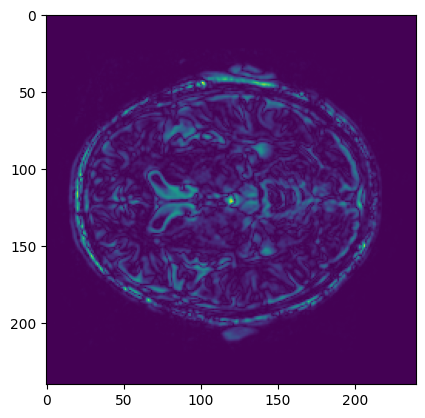

In [ ]:
magnitude = result[3]
plt.imshow(magnitude[:,:,20])

# Image registration

In [ ]:
flair_ant_image = ants.image_read('/content/drive/MyDrive/Colabs de procesamiento de imágenes/4/FLAIR.nii.gz')
t1_ant_image = ants.image_read('/content/drive/MyDrive/Colabs de procesamiento de imágenes/4/T1.nii.gz')

In [ ]:
ants.from_numpy(image_flair)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 48)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [ ]:
registration = ants.registration(fixed=flair_ant_image, moving=t1_ant_image, type_of_transform='Rigid')

In [ ]:
registered_image = registration['warpedmovout']

In [ ]:
registered_image

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 192)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [ ]:
registered_image.shape

(256, 256, 192)

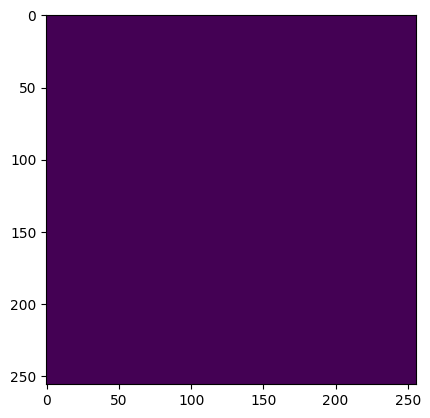

In [ ]:
plt.imshow(registered_image[:,:,24])

In [ ]:
from skimage.filters import threshold_local

In [ ]:
white_threshold = threshold_local(image_flair, 7, method='mean', offset=0.1)

In [ ]:
gray_threshold = threshold_local(image_flair, 7, method='mean', offset=-0.1)

In [ ]:
white_matter_mask = image_flair > white_threshold

In [ ]:
gray_matter_mask = (image_flair > gray_threshold) & (image_flair <= white_threshold)

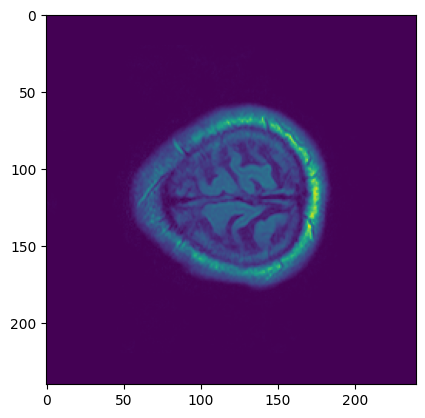

In [ ]:
plt.imshow(image_flair[:,:,40])

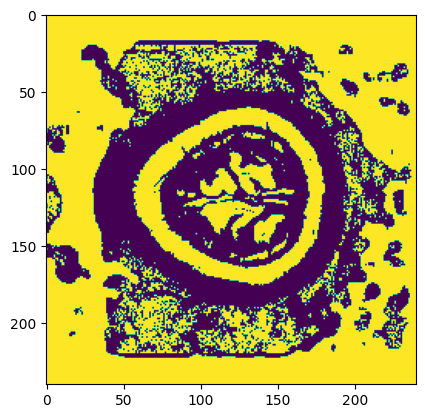

In [ ]:
plt.imshow(white_matter_mask[:,:,40])

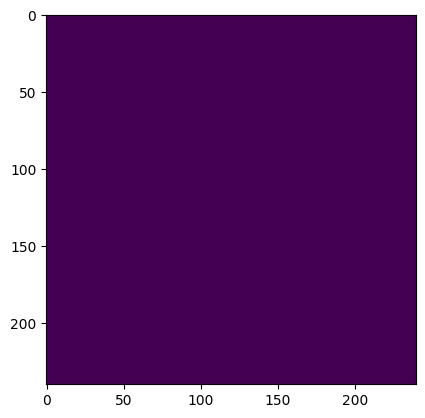

In [ ]:
plt.imshow(gray_matter_mask[:,:,40])

In [ ]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(image_flair.flatten(),prominence=30)

ValueError: ignored

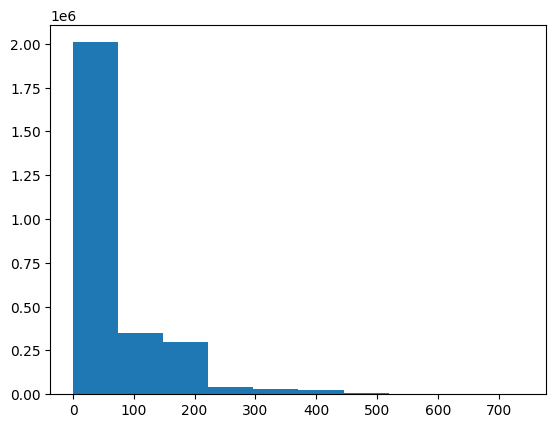

In [ ]:
plt.hist(image_flair.flatten())
plt.hist(peaks, image_flair.flatten()[peaks])

# Metrics



In [ ]:
def calculate_cluster_volume(segmentation):

  image_header = segmentation.header
  pix_dim = image_header['pixdim']
  pixel_size = np.prod(pix_dim[1:4])

  image_data = segmentation.get_fdata()
  unique_labels = np.unique(image_data)

  cluster_volumes = {}

  for label in unique_labels:
    if label == 0:
        continue

    cluster_mask = (image_data == label)
    cluster_pixels = np.sum(cluster_mask)
    cluster_volume = cluster_pixels * pixel_size

    cluster_volumes[label] = cluster_volume


  return cluster_volumes

In [ ]:
(segmented_image)

In [ ]:
image_flair = image_flair[:,:,25:27]

In [ ]:
image_flair

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [ ]:
np.unique(segmented_image.astype(int), return_counts=True)

(array([0, 1, 2, 3, 4]), array([2272125,   80999,  212454,  192747,    6475]))

In [ ]:
final_img = nib.Nifti1Image(image_flair, np.eye(4))

In [ ]:
final_img.header.set_data_dtype(np.float32)

In [ ]:
final_img

In [ ]:
nib.save(final_img, '/content/final_img_us.nii.gz')

In [ ]:
np.unique(seg_data.get_fdata()[:,:,20], return_counts=True)

NameError: ignored

In [ ]:
nib.load('/content/final_img.nii.gz')

In [ ]:
calculate_cluster_volume(nib.load('/content/final_img.nii.gz'))

{1.0: 4442.0, 2.0: 4665.0, 3.0: 5671.0, 4.0: 2387.0}

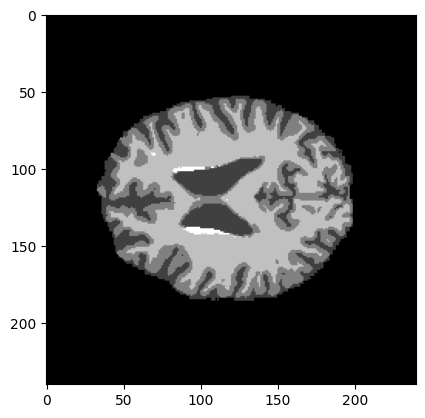

In [ ]:
plt.imshow(seg_data.get_fdata()[:,:,26], cmap="gray")

# Pipeline

In [8]:
image_data = nib.load('/content/drive/MyDrive/Colabs de procesamiento de imágenes/148/T1.nii.gz')
image_data_flair = nib.load('/content/drive/MyDrive/Colabs de procesamiento de imágenes/148/FLAIR.nii.gz')
seg_data = nib.load('/content/drive/MyDrive/Colabs de procesamiento de imágenes/148/seg.nii.gz')

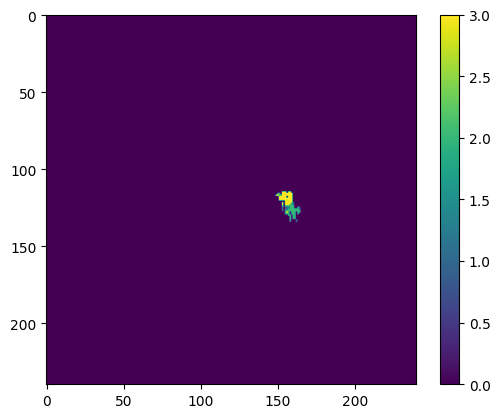

In [19]:
img = plt.imshow(seg_info[:,:,5])
plt.colorbar(img)
plt.show()

In [20]:
segmented_image = k_means(image_flair, 5)

[   0.          259.09225464  518.18450928  777.27676392 1036.36901855]


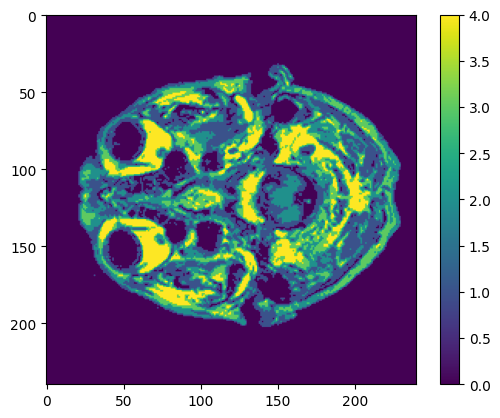

In [21]:
img = plt.imshow(segmented_image[:,:,5])
plt.colorbar(img)
plt.show()